In [1]:
# Step 1: imports + load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv("../data/train.csv")
print("Loaded. Shape:", df.shape)
df.head()


Loaded. Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Step 2: overview
print("Columns (count):", len(df.columns))
print("\nColumn types sample:\n", df.dtypes.head(10))
display(df.describe(include='all').T)   # descriptive stats


Columns (count): 81

Column types sample:
 Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from pathlib import Path
print("Project data folder listing:")
for p in sorted(Path("../data").iterdir()):
    print(p.name, p.stat().st_size, "bytes")


Project data folder listing:
columns.json 6229 bytes
test.csv 451405 bytes
train.csv 460676 bytes
X_preprocessed.csv 5652 bytes


In [4]:
# Step 4: missing values
mis = df.isnull().sum().sort_values(ascending=False)
mis = mis[mis > 0]
miss_df = pd.DataFrame({
    'missing_count': mis,
    'missing_percent': (mis / len(df) * 100).round(2)
})
display(miss_df)


,missing_count,missing_percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


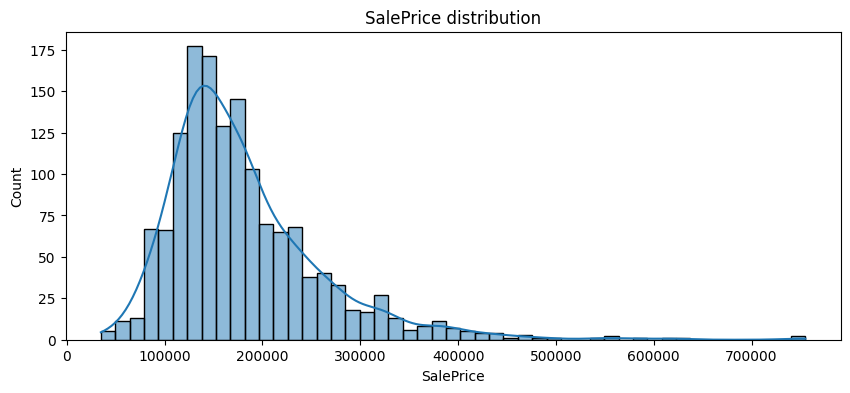

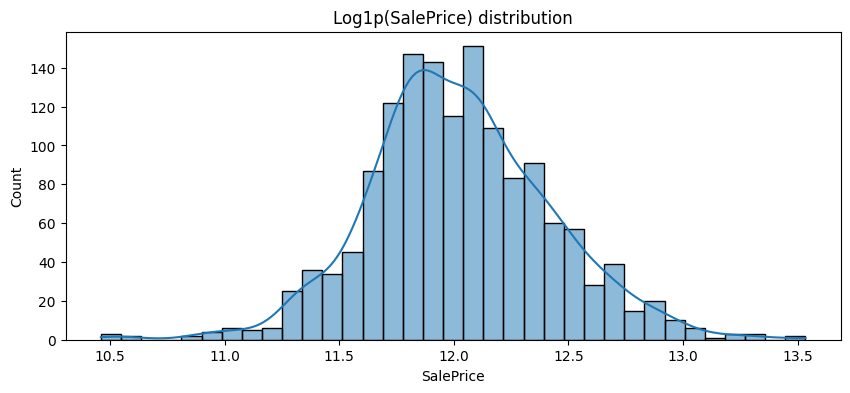

In [5]:
# Step 5: SalePrice distribution
plt.figure(figsize=(10,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice distribution")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(np.log1p(df['SalePrice']), kde=True)
plt.title("Log1p(SalePrice) distribution")
plt.show()


In [6]:
# Step 6: numeric correlations
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
corr = df[num_cols].corr()['SalePrice'].sort_values(ascending=False)
display(corr.head(20))


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

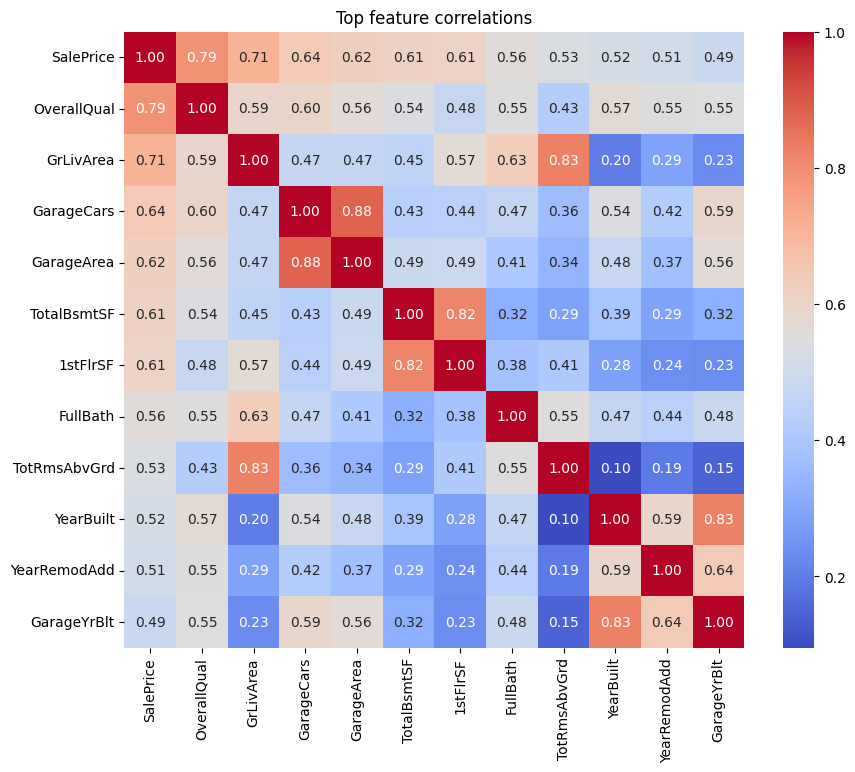

In [7]:
# Step 7: heatmap for top features
top_feats = corr.abs().sort_values(ascending=False).head(12).index.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[top_feats].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Top feature correlations")
plt.show()


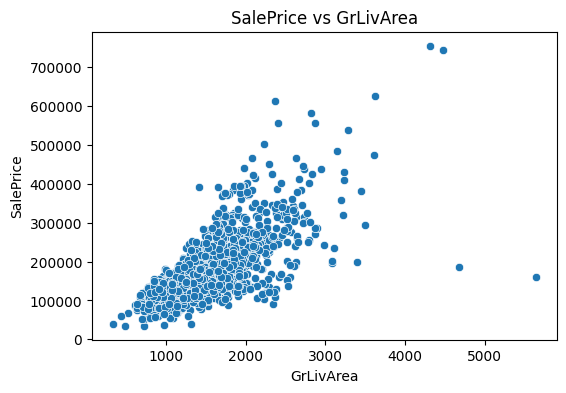

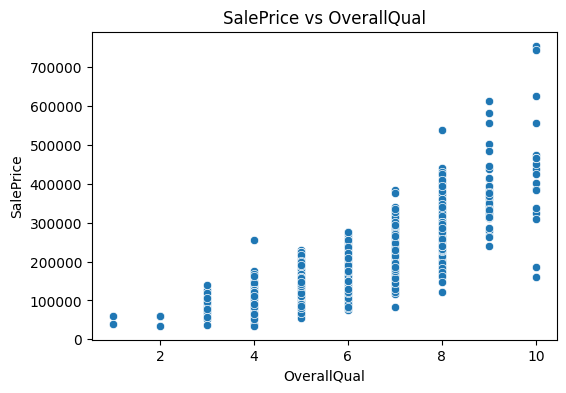

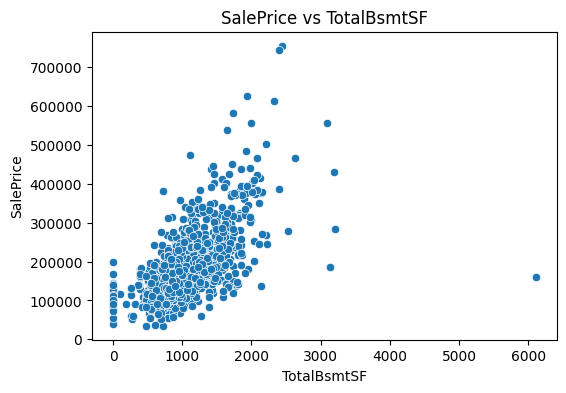

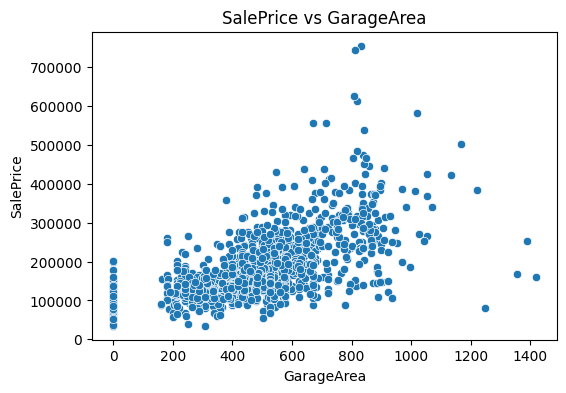

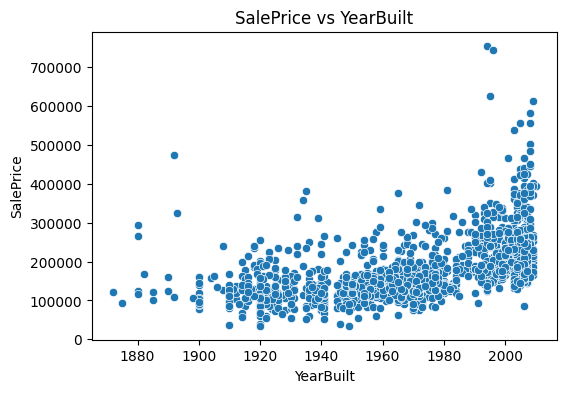

In [8]:
# Step 8: scatter + boxplots
for f in ['GrLivArea','OverallQual','TotalBsmtSF','GarageArea','YearBuilt'] :
    plt.figure(figsize=(6,4))
    if df[f].dtype == 'int64' or df[f].dtype=='float64':
        sns.scatterplot(x=df[f], y=df['SalePrice'])
    else:
        sns.boxplot(x=df[f], y=df['SalePrice'])
    plt.title(f"SalePrice vs {f}")
    plt.show()


In [9]:
# Step 9: categories
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols[:8]:
    print("----", c, "----")
    print(df[c].value_counts().head(10))
    print()


---- MSZoning ----
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

---- Street ----
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

---- Alley ----
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

---- LotShape ----
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

---- LandContour ----
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

---- Utilities ----
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

---- LotConfig ----
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

---- LandSlope ----
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64



In [10]:
# Step 10: save a snapshot
df.to_csv("../data/train_snapshot_after_eda.csv", index=False)
print("Snapshot saved to ../data/train_snapshot_after_eda.csv")


Snapshot saved to ../data/train_snapshot_after_eda.csv
